# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
# import libraries
from scipy import stats
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.5)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
medical = pd.read_csv('insurance2.csv')
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [3]:
medical.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
# select charges, plot histogram, and calculate mean and std

data = medical.charges

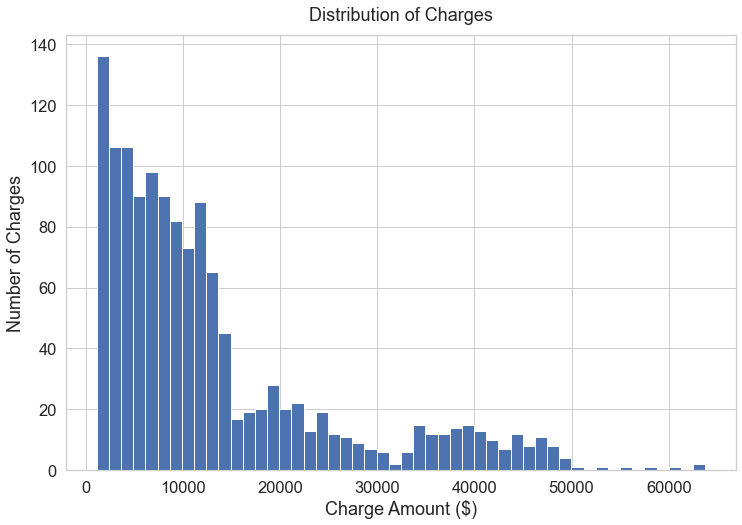

In [5]:
# plot histogram

plt.figure(figsize = (12, 8))

plt.hist(medical.charges, bins=50)
plt.xlabel('Charge Amount ($)')
plt.ylabel('Number of Charges')
plt.title('Distribution of Charges', pad = 15)
plt.show()

In [6]:
# calculate mean and std --> because of the large number of samples, n = 1338, std is calculated w/o correction

m = data.mean()
s = data.std()
print('Charges Mean:', round(m, 4))
print('Charges Standard Deviation:', round(s, 4))

Charges Mean: 13270.4223
Charges Standard Deviation: 12110.0112


#### Comments:
- The charges distribution is far from normal - it resembles (shifted) exponential distribution. 
- Because of this, the mean and std do not have the same meaning as in normal distribution.

### Problem 1: One-sample t-test

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ This is a one-sample t-test problem. To set it up more clearly we will consider 12000 as the expected mean value. 

The null hypothesis is: The population mean equals the expected mean of 12000. Or worded differently: The difference between the population mean and the expected mean is statistically insignificant.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Because this is a one-sample problem and the benchmark value is fixed at 12000 we need to consider one side of the t-distribution only. However, the p-value threshold would be 0.025 (half of 0.05) for the 95% confidence interval.

Calculations are performed below as follows:

In [7]:
# Calculate t-test statistics following steps below

n = len(data) # sample size
m_exp = 12000 # expected population mean
s_e = s/np.sqrt(n - 1) # standard error of the population mean
t_s = (m - m_exp) / s_e # t-test statistics; 
# warning!: do not use simply t as notation here because t is already taken for scipy.stats.t (see import libraries)

print('t = ', t_s)

t =  3.8359174636863043


In [8]:
# using above t-value calculate p accordingly

p = 1 - t.cdf(t_s, df = n - 1)
print('p = ', p)

p =  6.546269397034177e-05


#### Problem1 conclusion:
The p-value obtained is exteremly small - the threshold is p = 0.025.

Thus, the null hypothesis is rejected and the answer to the administrator's question is that the population mean cannot be 12000 or below.

### Problem 2: Two-sample t-test

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ To paraphrase the question: Are the average population charges for insured and uninsured different? 
- Thus, the null hypothesis is: The two means are equal. Worded differently: The difference between the population mean for insured and uninsured is statistically insignificant.
- The alternative hypothesis is: The difference between the population mean for insured and uninsured is statistically significant.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

In [9]:
# select charges for insured and uninsured, plot histograms, and calculate means and stds

# first, separate data into two subsets --> a) charges for uninsured; b) charges for insured 

# uninsured = 0
data_a = medical[medical.insuranceclaim == 0].charges
# insured = 1
data_b = medical[medical.insuranceclaim == 1].charges

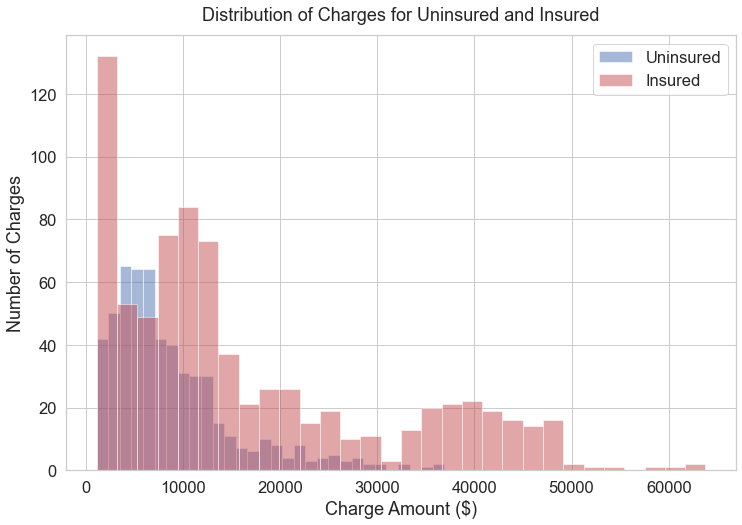

In [10]:
# plot their distributions on the same plot

plt.figure(figsize = (12, 8))

plt.hist(data_a, bins=30, color = 'b', alpha = 0.5, label = 'Uninsured')
plt.hist(data_b, bins=30, color = 'r', alpha = 0.5, label = 'Insured')
plt.xlabel('Charge Amount ($)')
plt.ylabel('Number of Charges')
plt.title('Distribution of Charges for Uninsured and Insured', pad = 15)
plt.legend()
plt.show()

#### Comments:
- From the plot we see that the two distributions overlap
- Visually it appears that the average charge for uninsured is smaller than that for insured
- The question is: Is the difference statistically significant?

In [17]:
# CaLculate mean and std for each distribution

# Uninsured
m_a = data_a.mean()
s_a = data_a.std()

# Insured
m_b = data_b.mean()
s_b = data_b.std()

print('Mean - Uninsured:', round(m_a, 4))
print('Standard Deviation - Uninsured:', round(s_a, 4))
print('\n')
print('Mean - Insured:', round(m_b, 4))
print('Standard Deviation - Insured:', round(s_b, 4))

Mean - Uninsured: 8821.4219
Standard Deviation - Uninsured: 6446.5101


Mean - Insured: 16423.9283
Standard Deviation - Insured: 14045.9284


In [13]:
# 1) calculate t from expressions

n_a = len(data_a) # sample_a size
n_b = len(data_b) # sample_b size

s_p = np.sqrt(((n_a - 1) * s_a ** 2 + (n_b - 1) * s_b ** 2) / (n_a + n_b - 2)) # average population error
t_th = (m_a - m_b) / s_p / np.sqrt(1/n_a + 1/n_b) # theoretical t-value
print('t = ', t_th)

t =  -11.89329903087671


In [14]:
# 2) calculate t- and p-values using scipy.stats.ttest_ind() function

t_s, p_s = stats.ttest_ind(data_a, data_b)
print('t = ', t_s)
print('p = ', p_s)

t =  -11.893299030876712
p =  4.461230231620717e-31


The t-vaulues calculated from expressions and using scipy.stats are the same.

In [15]:
# caluclate p using t.cdf(t_th)
p_th = t.cdf(t_th, df = n_a + n_b - 2)
print('p = ', p_th)

p =  2.230615115810486e-31


The calculated p-value using t.cdf() is exactly 1/2 of the value calculated using scipy.stats.ttest_ind()!

The reason is that we don't account for the fact that there are two samples and, in effect, two t-distributions which could overlap - one from the positive tail and the other from the negative tail.

Thus the probability is doubled. That's why when calculating p-value for two-sample tests using t.cdf() the result needs to be multiplied by two.

In [16]:
# correct p-value
p_th = 2 * p_th
print('p = ', p_th)

p =  4.461230231620972e-31


#### Problem 2 conclusion:
The obtained p-value indicates that the probability of the two population means - uninsured and insured - is very small.
The null hypothesis is rejected. We can conclude that the average of insured charges are greater than that of uninsured.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Scypy.stats has a function calculating the z-score - scipy.stats.zscore(). However, it calculates the zscore for each value in the sample relative to the sample mean and standard deviation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test